In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

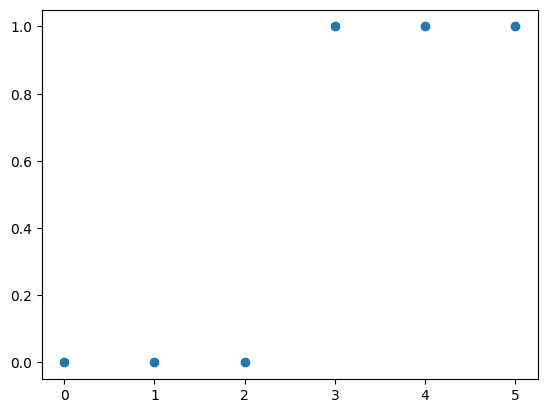

In [3]:
plt.scatter(x_train,y_train)
plt.show()

In [4]:
def getParameters(x):
    if x.ndim==1:
        w=0
        b=0
        return w,b
    elif x.ndim==2:
        m=x.shape[0]
        w=np.zeros(m)
        b=0
        return w,b

In [5]:
def Regression(x,y,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    if x.ndim==1:
        for i in range (m):
            f_wb[i]=(w*x[i])+b
        return f_wb
    elif x.ndim==2:
        for i in range (m):
            f_wb[i]=(np.dot(w[i],x[i]))+b
        return f_wb

In [6]:
def Sigmoid(z):
    z=(1/(1+np.exp(-z)))
    return z

In [7]:
def Cost(y,f_wb):
    cost=0
    C=[]
    m=y.shape[0]
    for i in range (m):
        diff=(y[i]*(np.log(f_wb[i]))+(1-y[i])*(np.log(1-f_wb[i])))
        cost=cost+diff
        C.append(diff)
    cost=(-cost)/m
    return cost,C

In [8]:
def min_max_normalization(data):
    max=np.max(data,axis=0)
    min=np.min(data,axis=0)
    normalised_data=(data-min)/(max-min)
    return normalised_data,max,min

In [9]:
def denormalize(normalised_data,max,min):
    data=((normalised_data*(max-min))+min)
    return data

In [10]:
def Gradient_Descent(x,y,f_wb,alpha,w,b):
    if x.ndim==1:
        m=x.shape[0]
        shift_w=0
        shift_b=0
        for i in range (m):
            shift_b=shift_b+(f_wb[i]-y[i])
            shift_w=shift_w+((f_wb[i]-y[i])*x[i])
        shift_b=(alpha*shift_b)/m
        shift_w=(alpha*shift_w)/m
        b=b-shift_b
        w=w-shift_w
        return w,b
    elif x.ndim==2:
        m=x.shape[0] #number of examples
        n=x.shape[1] #number of features
        shift_b=0
        shift_w=np.zeros(n)
        for i in range (m):
            shift_b=shift_b+(f_wb[i]-y[i])
            for j in range (n):
                shift_w[i]=shift_w[i]+((f_wb[i]-y[i])*x[i,j])
        shift_b=(alpha*shift_b)/m
        shift_w=(alpha*shift_w)/m
        b=b-shift_b
        w=w-shift_w
        return w,b

In [11]:
def Decision_Boundary(f_wb,limit):
    m=f_wb.shape[0]
    for i in range(m):
        if f_wb[i]>limit:
            f_wb[i]=1
        else:
            f_wb[i]=0
    return f_wb

In [12]:
def Accuracy(y,f_wb):
    accuracy=0
    m=y.shape[0]
    for i in range(m):
        if f_wb[i]==y[i]:
            accuracy+=1
    accuracy=(accuracy*100)/m
    return accuracy

In [13]:
x_normalised,x_train_max,x_train_min=min_max_normalization(x_train)
print(x_normalised)
print(x_train_max)
print(x_train_min)

[0.  0.2 0.4 0.6 0.8 1. ]
5.0
0.0


In [14]:
y_normalised,y_train_max,y_train_min=min_max_normalization(y_train)
print(y_normalised)
print(y_train_max)
print(y_train_min)

[0. 0. 0. 1. 1. 1.]
1
0


In [15]:
w,b=getParameters(x_train)
print(w)
print(b)

0
0


In [16]:
prediction=Regression(x_normalised,y_normalised,w,b)
print(prediction)

[0. 0. 0. 0. 0. 0.]


In [17]:
prediction=Sigmoid(prediction)
print(prediction)

[0.5 0.5 0.5 0.5 0.5 0.5]


In [18]:
cost,C=Cost(y_normalised,prediction)
print(cost)

0.6931471805599453


In [19]:
alpha=1
w,b=Gradient_Descent(x_normalised,y_normalised,prediction,alpha,w,b)
print(w,b)

0.15 0.0


In [20]:
prediction=Regression(x_normalised,y_normalised,w,b)
prediction=Sigmoid(prediction)
cost,C=Cost(y_normalised,prediction)
print(cost)

0.671677743064715


old cost=  0.03621683352237847  new cost=  0.0362068367397217
Number of iterations taken=  2708
[1.92911204e-05 1.50841631e-03 1.05786231e-01 9.02572142e-01
 9.98623450e-01 9.99982398e-01]


Text(0.5, 1.0, 'Learning Curve')

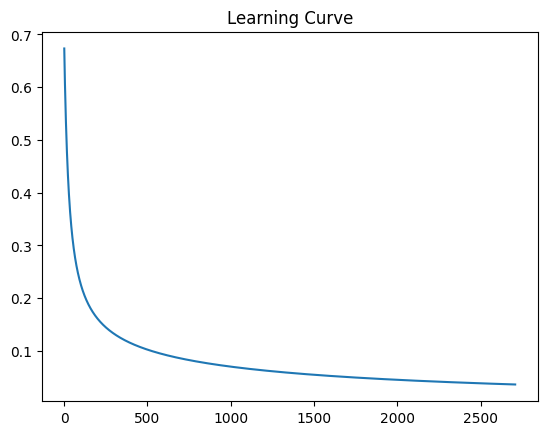

In [21]:
w,b=getParameters(x_train)
converged=False
e=0.00001
t=[]
new_cost=0
old_cost=1
i=0
while not converged:
    i=i+1
    w,b=Gradient_Descent(x_normalised,y_normalised,prediction,alpha,w,b)
    prediction=Regression(x_normalised,y_normalised,w,b)
    prediction=Sigmoid(prediction)
    new_cost,C=Cost(y_normalised,prediction)
    t.append(new_cost)
    if abs(new_cost-old_cost)<e:
        print("old cost= ",old_cost," new cost= ",new_cost)
        converged=True
    old_cost=new_cost
    
print("Number of iterations taken= ",i)
print(prediction)
z=range(1,i+1)
plt.plot(z,t)
plt.title("Learning Curve")

In [22]:
prediction=Decision_Boundary(prediction,0.5)
print(prediction)
accuracy=Accuracy(y_train,prediction)
print(accuracy,"%")

[0. 0. 0. 1. 1. 1.]
100.0 %
